In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('/Users/felixbehrendt/neuefische/EDA_project/data/King_County_House_prices_dataset.csv')
# display Dataframe and check Import
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
# Prices
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

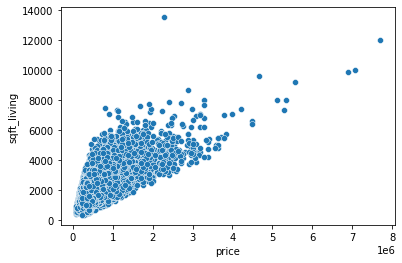

In [26]:
# cut prices into bins
df['price_ranges'] = pd.qcut(df.price, q = 4, labels=['low', 'middle', 'high', 'very high'])
#df['price_ranges'] = pd.qcut(df.price, q = 4)
# print(df.describe())
df.head()

# scatterplot
sns.scatterplot(
    data=df,
    y='sqft_living',
    x='price'
)

In [16]:
df_grouped = df.groupby('price_ranges').mean().reset_index()
df_grouped




,price_ranges,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"(77999.999, 322000.0]",4.538675e+09,251769.994451,3.035886,1.664169,1466.555494,10436.147984,1.274972,0.000415,0.039332,3.410655,6.805031,1315.624491,1967.234924,48.762697,98075.343137,47.440569,-122.225728,1556.114132,9780.113393
1,"(322000.0, 450000.0]",4.530098e+09,385844.123232,3.229201,1.959596,1780.336272,12773.881726,1.456933,0.001455,0.096649,3.363085,7.294582,1555.883747,1972.814509,52.173047,98083.680073,47.565329,-122.219366,1779.944353,11426.611570
2,"(450000.0, 645000.0]",4.745439e+09,539741.328558,3.408000,2.169535,2083.347535,15886.255256,1.533488,0.002694,0.178918,3.404279,7.698233,1754.890233,1971.099163,74.940032,98079.093953,47.615498,-122.207984,1997.465302,13563.318140
3,"(645000.0, 7700000.0]",4.508528e+09,987839.436976,3.823869,2.675061,2999.178551,21363.192515,1.712903,0.026001,0.624066,3.461925,8.844349,2534.302365,1972.849562,159.257751,98073.627444,47.619641,-122.202705,2618.602309,16300.245950


<AxesSubplot:xlabel='price_ranges', ylabel='bedrooms'>

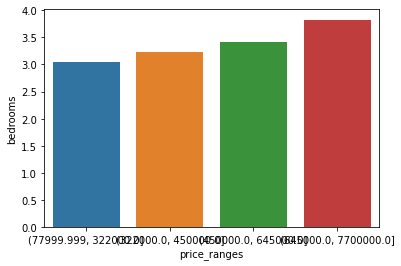

In [22]:
# Plot 
sns.barplot(
    data=df_grouped,
    y='bedrooms',
    x='price_ranges')

<AxesSubplot:xlabel='grade', ylabel='price'>

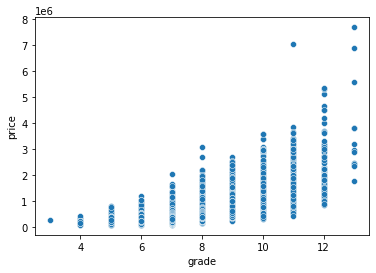

In [32]:
sns.scatterplot(
    data=df,
    x='grade',
    y='price'
)

In [45]:
livelyhood = df.groupby('zipcode').count().sort_values('id', ascending=False).reset_index()
lively_areas = livelyhood.zipcode.loc[1:10]
lively_areas

1     98038
2     98115
3     98052
4     98117
5     98042
6     98034
7     98118
8     98023
9     98006
10    98133
Name: zipcode, dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

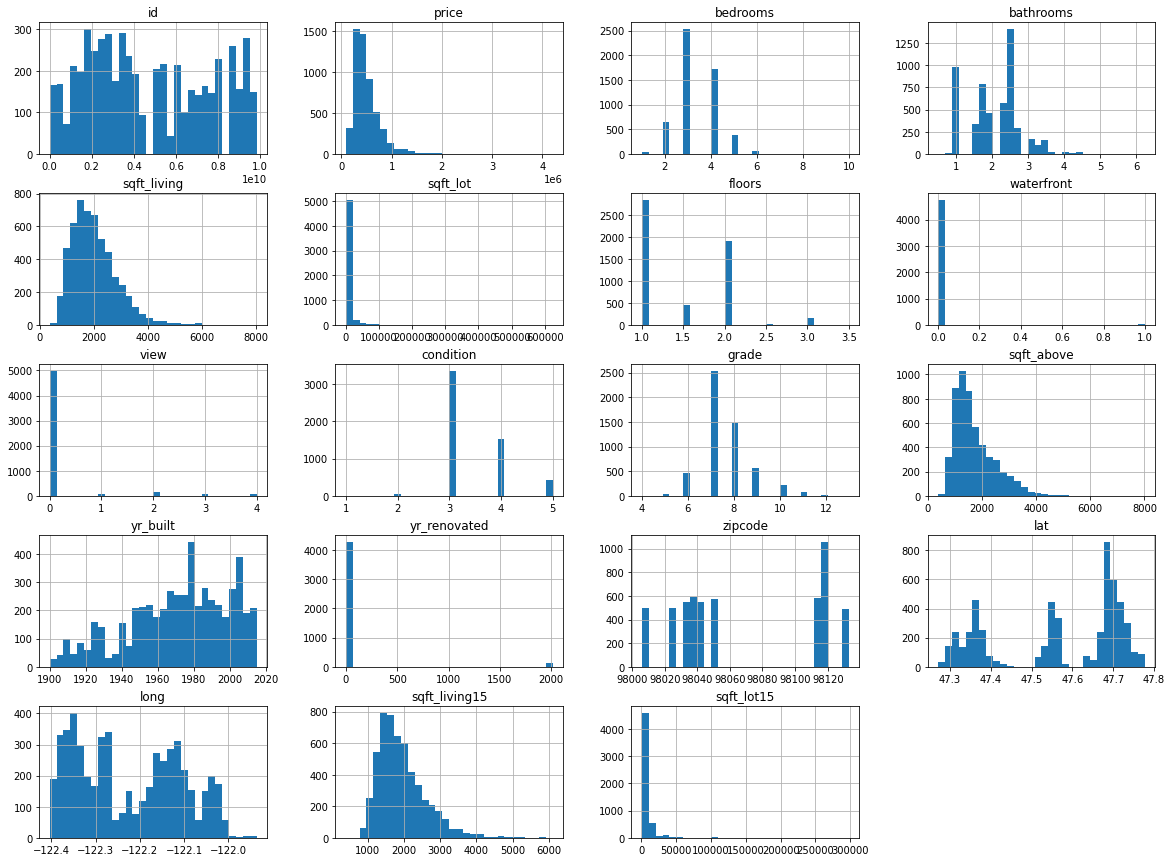

In [47]:
lively_df = df[df['zipcode'].isin(lively_areas)]
lively_df.hist(bins=30, figsize=(20, 15))